In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
path = "/home/hagen/Documents/master_project/Data_generation/Output/"
datalabel = "parallel2025-05-05_18-01-58"
data_path = os.path.join(path, datalabel)
N_df = pd.read_csv(os.path.join(data_path, "N.dat"),delimiter = " ")
eta_df = pd.read_csv(os.path.join(data_path, "packing_fraction.dat"),delimiter = ";")

In [67]:
grouped = N_df.groupby(["mu","rho"])
mu =[mu for mu, _ in grouped.groups]
N_by_mu_and_density = {
    (mu_value, density_value): group["N"].to_numpy()
    for (mu_value, density_value), group in grouped
}
N_means={(mu_val,density_val):np.mean(group["N"].to_numpy()) for (mu_val,density_val),group in grouped}
N_vars={(mu_val,density_val):np.var(group["N"].to_numpy()) for (mu_val,density_val),group in grouped}
mu_values = np.unique(N_df["mu"].to_numpy())
density_values = np.unique(N_df["rho"].to_numpy())
N_mean_array = np.array([N_means[(mu_val,density_val)] for mu_val in mu_values for density_val in density_values])
N_var_array = [N_vars[(mu_val,density_val)] for mu_val in mu_values for density_val in density_values]



## Sanity check

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_237698/1852002938.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(steps[i], N[i], label = f"$\mu$ = {mu[i]}")


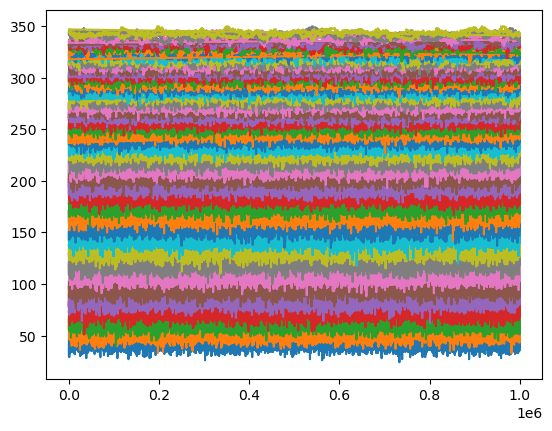

In [21]:
plt.figure
for i in range(len(N)):
    plt.plot(steps[i], N[i], label = f"$\mu$ = {mu[i]}")


## Determine kappa

### Through fluctuations

In [70]:
n_inv = {key:(30*30)/N_means[key] for key in N_means.keys()}
kappa = {key: n_inv[key] * N_vars[key]/N_means[key] for key in N_means.keys()}

n_inv_array=np.stack((np.array([n_inv[(mu_val,0.2)] for mu_val in mu_values]),np.array([n_inv[(mu_val,0.4)] for mu_val in mu_values])),axis=0)
mu_array = np.array([mu_val for mu_val in mu_values])
N_mean_array1 = np.array([N_means[(mu_val,0.2)] for mu_val in mu_values])
N_mean_array2 = np.array([N_means[(mu_val,0.4)] for mu_val in mu_values])
N_mean_array= np.stack((N_mean_array1,N_mean_array2),axis=0)



Text(0.5, 1.0, '$\\kappa_T$ determined through $\\kappa_T=\\frac{1}{nk_{B}T} \\frac{\\langle(\\delta N)^{2}\\rangle}{\\langle N \\rangle }$')

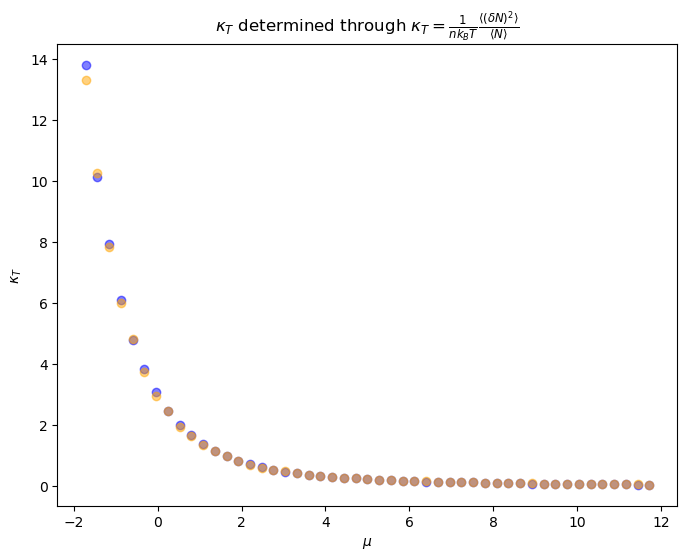

In [71]:
## Plot kappa against mu, two values for kappa by the two densities
colors = {0.2: "blue", 0.4: "orange"}

plt.figure(figsize=(8, 6))
for i in kappa.keys():
    plt.scatter(i[0], kappa[i], color = colors[i[1]], alpha = 0.5,marker="o")
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\kappa_T$")
plt.title(r"$\kappa_T$ determined through $\kappa_T=\frac{1}{nk_{B}T} \frac{\langle(\delta N)^{2}\rangle}{\langle N \rangle }$")

### Through derivative

In [76]:
print(np.shape(N_mean_array),np.shape(n_inv_array))
mu_array

(2, 49) (2, 49)


array([-1.72, -1.44, -1.16, -0.88, -0.6 , -0.32, -0.04,  0.24,  0.52,
        0.8 ,  1.08,  1.36,  1.64,  1.92,  2.2 ,  2.48,  2.76,  3.04,
        3.32,  3.6 ,  3.88,  4.16,  4.44,  4.72,  5.  ,  5.28,  5.56,
        5.84,  6.12,  6.4 ,  6.68,  6.96,  7.24,  7.52,  7.8 ,  8.08,
        8.36,  8.64,  8.92,  9.2 ,  9.48,  9.76, 10.04, 10.32, 10.6 ,
       10.88, 11.16, 11.44, 11.72])

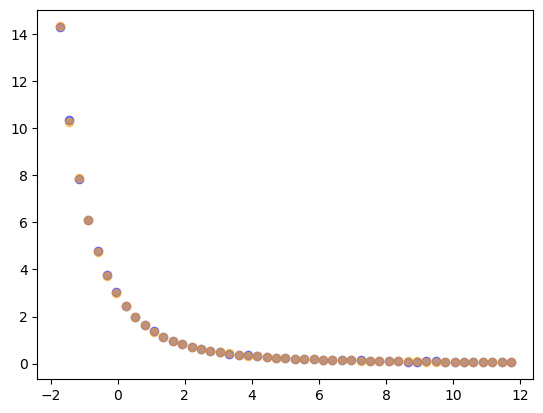

In [79]:
deriv = np.gradient(N_mean_array,mu_array,axis=1)
kappa2 = n_inv_array *deriv/N_mean_array
plt.figure()
plt.scatter(mu_array, kappa2[0,:], color = "blue", alpha = 0.5,marker="o",label = "density 0.2")
plt.scatter(mu_array, kappa2[1,:], color = "orange", alpha = 0.5,marker="o",label = "density 0.4")
